## Load run data
Run this block to load run data

In [1]:
import libutil.runs
import libutil.datasets
import libutil.models
import libutil.traders

from user_vars import USER_VARS

run_name = "intra-gcnn-testing"
run_file = None # will default to runs/sample_runs.json
run_data = libutil.runs.from_file(run_file, run_name, ALPHAVANTAGE_APIKEY=USER_VARS["ALPHAVANTAGE_APIKEY"])

dataset = libutil.datasets.from_run(run_data)

> Reading run file runs/sample_runs.json
Copying from run Intra-GMLP-TQQQ
Copying from run Intra-LSTM-TQQQ
> Running Intra-GCNN-Testing-TQQQ

[-8, -7, -6, -5, -4, -3, -2, -1, 0]


https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-04
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-05
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-06
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-07
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&extended_hours=False&datatype=csv&apikey=AG2AUAJI529OE0XJ&month=2023-08
https://www.alphavantage.co/query?symbol=TQQQ&function=TIME_SERIES_INTRADAY&interval=5min&outputsize=full&exte

Loading indicators EMA,MACD
Processing 35028 values


100%|█████████████████████████████████| 35007/35007 [00:00<00:00, 630778.09it/s]


Processing 35028 values


100%|█████████████████████████████████| 35015/35015 [00:00<00:00, 313479.45it/s]


      Unnamed: 0           timestamp    open    high     low   close  volume   
3621        3621 2023-04-03 06:10:00  27.606  27.626  27.587  27.598   22986  \
3620        3620 2023-04-03 06:15:00  27.616  27.636  27.597  27.608   26267   
3619        3619 2023-04-03 06:20:00  27.616  27.626  27.597  27.618   16753   
3618        3618 2023-04-03 06:25:00  27.625  27.626  27.577  27.588   32121   
3617        3617 2023-04-03 06:30:00  27.596  27.616  27.577  27.598   49349   

      close_ema20  close_macd26  dt_hour  
3621    27.756263     -0.015782        6  
3620    27.781857      0.435674        6  
3619    27.804061      0.404662        6  
3618    27.824151      0.375753        6  
3617    27.846041      0.351932        6  



## Train & Load Model
Run this code to load a model from current run data and perform one training epoch

In [2]:
device = 'mps'
model = libutil.models.from_run(run_data, device=device)
model.standard_train(dataset)

> Model loader parameters:
Using model GatedCNN.
Using device mps.

> Model config: 
ModelConfig(loss='mean_squared_error', optimizer='adam', test_split=0.1, validation_split=0.2, batch_size=64, epochs=1, hidden_layer_size=128, dropout_rate=0.1, seq_len=72, out_seq_len=1, precompile=False, pin_memory=True, indicators=[{'function': 'EMA', 'period': 20, 'is_input': True, 'is_scaled': True, 'name': 'close_ema20'}, {'function': 'MACD', 'period': 26, 'period2': 12, 'is_input': True, 'is_scaled': False, 'name': 'close_macd26'}], columns=[{'name': 'close', 'is_scaled': True}, {'name': 'close_ema20', 'from_indicator': True, 'is_scaled': True}, {'name': 'close_macd26', 'from_indicator': True, 'is_scaled': False}])

> Training model GatedCNN.
Total trainable params: 459147

Splitting data at a 0.8 ratio: 19582/4896

Fitting dataset.
Before:  [[35.05       34.98005257 -0.09365385]
 [34.99       34.98099994  0.08467457]
 [34.97       34.97995233  0.0736602 ]] dtype= float64
After:  [[-0.33366732 -

306/306 [██████████████████████████████] 00:05 - eta: 00:00, 57.25it/s
306/306 [██████████████████████████████] 00:28 - eta: 00:00, 10.57it/s, loss=0.05554, loss($)=0.807 
 77/77  [██████████████████████████████] 00:03 - eta: 00:00, 25.56it/s, val_loss=0.003314, val_loss($)=0.1971


Done in user: 37.32s; sys: 35.86s.



## Show dataset
Show this block to see a preview of the dataset

In [2]:
dataset.df
# dataset.df.iloc[0]

,Unnamed: 0,timestamp,open,high,low,close,volume,close_ema20,close_macd26,dt_hour
3621,3621,2023-04-03 06:10:00,27.606,27.626,27.587,27.598,22986,27.756263,-0.015782,6
3620,3620,2023-04-03 06:15:00,27.616,27.636,27.597,27.608,26267,27.781857,0.435674,6
3619,3619,2023-04-03 06:20:00,27.616,27.626,27.597,27.618,16753,27.804061,0.404662,6
3618,3618,2023-04-03 06:25:00,27.625,27.626,27.577,27.588,32121,27.824151,0.375753,6
3617,3617,2023-04-03 06:30:00,27.596,27.616,27.577,27.598,49349,27.846041,0.351932,6
...,...,...,...,...,...,...,...,...,...,...
32188,4,2023-12-01 19:35:00,44.420,44.440,44.410,44.420,3344,37.991137,-0.043057,19
32187,3,2023-12-01 19:40:00,44.430,44.430,44.410,44.420,1920,37.991029,-0.038312,19
32186,2,2023-12-01 19:45:00,44.420,44.430,44.400,44.405,9147,37.997598,-0.028574,19
32185,1,2023-12-01 19:50:00,44.410,44.430,44.400,44.430,7737,38.014017,-0.011844,19


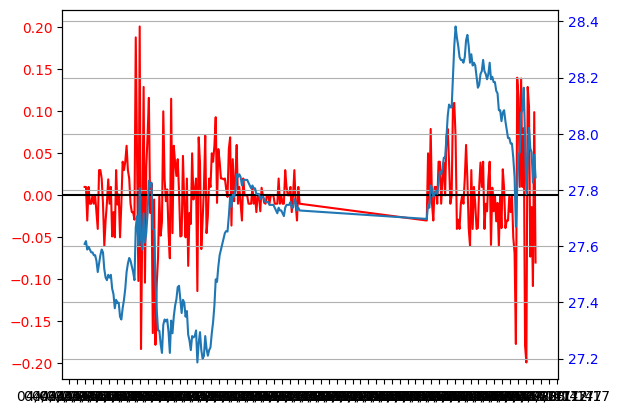

In [13]:
dataset.df['diff'] = dataset.df['close'].diff()

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

COUNT = 250

times = dataset.df['timestamp'].iloc[1:COUNT]
close = dataset.df['close'].iloc[1:COUNT]
diff = dataset.df['diff'].iloc[1:COUNT]

myFmt = mdates.DateFormatter('%m/%d/%y %H:%M')
fig, ax = plt.subplots()
ax2 = ax.twinx()

plt.gca().xaxis.set_major_formatter(myFmt)
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
plt.xticks(rotation=45, fontweight='light',  fontsize='x-small', ha='right', rotation_mode='anchor')

ax.plot(times, diff, c='r')
ax.tick_params(axis='y', labelcolor='red')
ax2.plot(times, close)
ax2.tick_params(axis='y', labelcolor='blue')


ax.axhline(y=0, color='k')
# ax.axvline(x=0, color='k')

plt.grid(True, which="both")
plt.show()

## Visualize predictions
Run this block to show a visualization of the predictions

### Training helper parameters

In [10]:

cutoff = 72 # how many of the real datapoints to cut off
test_len = 100 # how many inferences to make

### Training helper function

In [8]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
import torch

def test():
    close_values = dataset.df['close'].iloc[cutoff:model.conf.seq_len].to_numpy()

    for i in range(test_len):
        X = torch.Tensor(dataset.df[model.conf.column_names].iloc[i:i+model.conf.seq_len].to_numpy()).to(device)
        Y = model.module.forward(X).squeeze(0)
        close_values = np.append(close_values, Y[0].item())

    times = pd.to_datetime(dataset.df['timestamp'][cutoff:model.conf.seq_len+test_len])

    myFmt = mdates.DateFormatter('%m/%d/%y %H:%M')
    plt.gca().xaxis.set_major_formatter(myFmt)
    plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=30))
    plt.xticks(rotation=45, fontweight='light',  fontsize='x-small', ha='right', rotation_mode='anchor')
    plt.plot(times, close_values, c='r')
    plt.plot(times, dataset.df['close'].iloc[cutoff:model.conf.seq_len+test_len])
    plt.show()

###

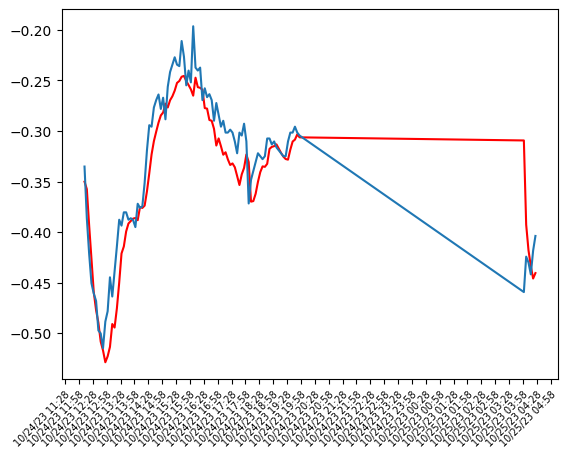

In [9]:
test()

## Visualize training
Run this block to show a visualization of the training and plot predictions at each step

> Training model GatedCNN.
Total trainable params: 459147

Splitting data at a 0.8 ratio: 19582/4896

Fitting dataset.
Before:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64
After:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64

Epoch 1/1; Total epochs: 6/6
GPU: 0.00MB Pinning


306/306 [██████████████████████████████] 00:05 - eta: 00:00, 53.33it/s
306/306 [██████████████████████████████] 00:27 - eta: 00:00, 11.07it/s, loss=0.003018, loss($)=0.05494 
 77/77  [██████████████████████████████] 00:03 - eta: 00:00, 24.59it/s, val_loss=0.003111, val_loss($)=0.05578 



Done in user: 36.53s; sys: 34.10s.



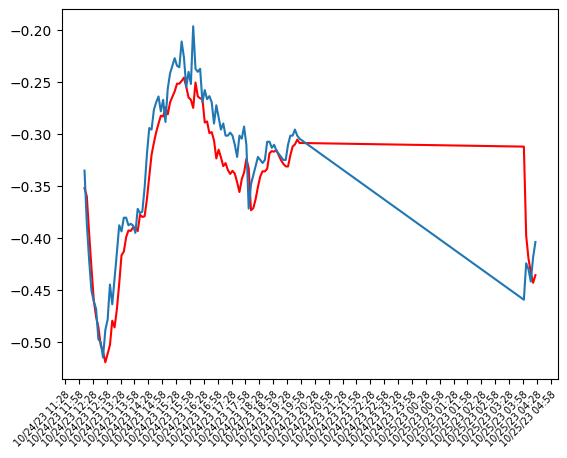

> Training model GatedCNN.
Total trainable params: 459147

Splitting data at a 0.8 ratio: 19582/4896

Fitting dataset.
Before:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64
After:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64

Epoch 1/1; Total epochs: 7/7
GPU: 0.00MB Pinning


306/306 [██████████████████████████████] 00:06 - eta: 00:00, 48.19it/s
306/306 [██████████████████████████████] 00:27 - eta: 00:00, 11.10it/s, loss=0.002696, loss($)=0.05192 
 77/77  [██████████████████████████████] 00:02 - eta: 00:00, 27.19it/s, val_loss=0.003093, val_loss($)=0.05561 



Done in user: 36.76s; sys: 35.61s.



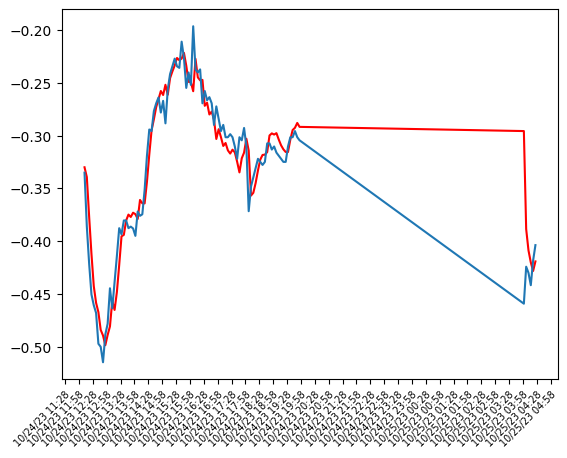

> Training model GatedCNN.
Total trainable params: 459147

Splitting data at a 0.8 ratio: 19582/4896

Fitting dataset.
Before:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64
After:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64

Epoch 1/1; Total epochs: 8/8
GPU: 0.00MB Pinning


306/306 [██████████████████████████████] 00:05 - eta: 00:00, 57.79it/s
306/306 [██████████████████████████████] 00:32 - eta: 00:00,  9.47it/s, loss=0.00359, loss($)=0.05991  
 77/77  [██████████████████████████████] 00:02 - eta: 00:00, 25.99it/s, val_loss=0.001433, val_loss($)=0.03786



Done in user: 40.56s; sys: 38.71s.



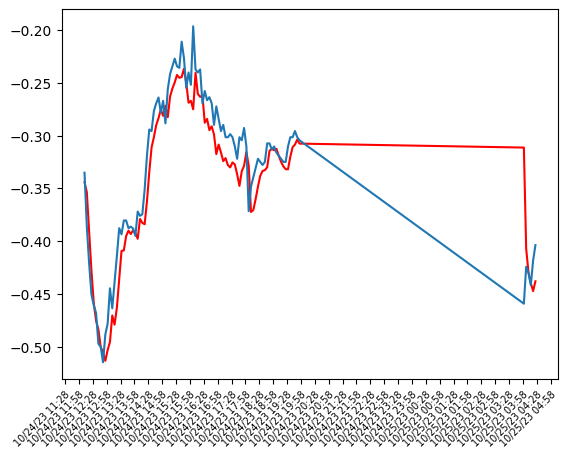

> Training model GatedCNN.
Total trainable params: 459147

Splitting data at a 0.8 ratio: 19582/4896

Fitting dataset.
Before:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64
After:  [[-0.33366732 -0.35543583 -0.09365385]
 [-0.3511899  -0.35515738  0.08467457]
 [-0.35703076 -0.35546529  0.0736602 ]] dtype= float64

Epoch 1/1; Total epochs: 9/9
GPU: 0.00MB Pinning


306/306 [██████████████████████████████] 00:05 - eta: 00:00, 53.41it/s
306/306 [██████████████████████████████] 00:27 - eta: 00:00, 11.31it/s, loss=0.003234, loss($)=0.05687
 77/77  [██████████████████████████████] 00:03 - eta: 00:00, 24.10it/s, val_loss=0.002862, val_loss($)=0.0535 



Done in user: 35.98s; sys: 35.10s.



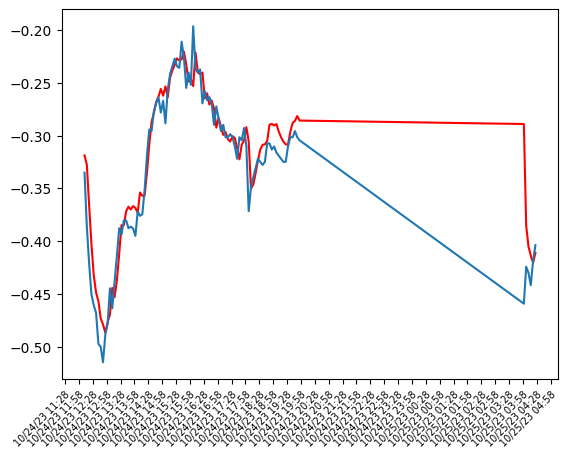

In [11]:

for i in range(4):
    model.standard_train(dataset)
    test()